In [1]:
import cv2
import os
import torch,torchvision
import torch.nn as nn
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.nn import *
from torch.utils.tensorboard import SummaryWriter

In [2]:
IMG_SIZE = 112

In [3]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor()]) 

In [4]:
def load_data(directory,IMG_SIZE = IMG_SIZE):
    idx = -1
    data = []
    for file in tqdm(os.listdir(directory)):
        file = directory + file
        img = cv2.imread(file,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        data.append(np.array(transforms(np.array(img))))
    return data

In [5]:
X = load_data(directory='./data/')
np.save('./data.npy',np.array(X))
X = np.load('./data.npy')

100%|██████████| 850/850 [00:10<00:00, 77.68it/s]


In [6]:
X = X[:250]

In [7]:
import matplotlib.pyplot as plt

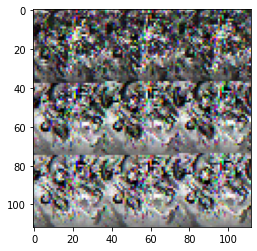

In [8]:
plt.imshow(torch.tensor(X[0]).view(IMG_SIZE,IMG_SIZE,3))

In [9]:
class Desc(nn.Module):
    def __init__(self,activation=nn.LeakyReLU,starter=16):
        super().__init__()
        self.dis = nn.Sequential(
            nn.Conv2d(3,4,3),
            activation(),
            nn.Conv2d(4,8,3),
            activation(),
        )
        self.dis2 = nn.Sequential(
            nn.Linear(93312,starter),
            activation(),
            nn.Linear(starter,starter*2),
            activation(),
            nn.Linear(starter*2,starter),
            activation(),
            nn.Linear(starter,1),
            nn.Sigmoid(),
        )
     
    def forward(self, x,shape=False):
        x = x.view(-1,3,IMG_SIZE,IMG_SIZE)
        x = self.dis(x)
        if shape:
            print(x.shape)
        x = x.view(-1,93312)
        x = self.dis2(x)
        return x
        
class Gen(nn.Module):
    def __init__(self,z_dim,activation=nn.LeakyReLU,starter=256):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim,starter),
            activation(),
            nn.Linear(starter,starter*2),
            activation(),
            nn.Linear(starter*2,starter*4),
            activation(),
            nn.Linear(starter*4,starter*2),
            activation(),
            nn.Linear(starter*2,IMG_SIZE*IMG_SIZE*3),
            nn.Tanh()
        )
 
    def forward(self, x):
        return self.gen(x)

In [10]:
device = 'cuda'

In [11]:
import wandb

In [12]:
PROJECT_NAME = 'Abstract-Paiting-V2'

In [13]:
# lr = 3e-4
# z_dim = 64
# image_dim = IMG_SIZE*IMG_SIZE*3
# batch_size = 32
# epochs = 25
# fixed_noise = torch.randn((batch_size,z_dim)).to(device)
# gen = Gen(z_dim).to(device)
# desc = Desc().to(device)
# opt_disc = optim.Adam(desc.parameters(),lr=lr)
# opt_gen = optim.Adam(gen.parameters(),lr=lr)
# criterion = nn.BCELoss()

In [14]:
image_dim = IMG_SIZE*IMG_SIZE*3

In [15]:
# nomalization = 0.75,0.75
# z_dim = 16
# batch_size = 32
# criterion = 
# opt_disc_optimizer = 
# opt_gen_optimizer = 
# lr = 
# gen_activation = 
# desc_activation = 
# gen_starter = 
# desc_starter = 
# epochs
writer_fake = SummaryWriter(f"logs/fake")
writer_real = SummaryWriter(f"logs/real")
step = 0

In [16]:
from ray import tune

In [17]:
import pickle

In [18]:
def return_loss(lossG,lossD):
    loss = lossG+lossD
    return loss

In [ ]:
import cv2
import numpy as np

img = cv2.imread('your_image.jpg')
res = cv2.resize(img, dsize=(54, 140), interpolation=cv2.INTER_CUBIC)
resized = cv2.resize(image, (640, 480), interpolation = cv2.INTER_NEAREST)

In [ ]:
analysis = tune.run(
    train,
    config={
        "z_dim": tune.grid_search([32,64,128]),
        "batch_size": tune.grid_search([16,32,64]),
        "opt_disc": tune.grid_search([torch.optim.Adam,torch.optim.AdamW,torch.optim.Adamax]),
        "opt_gen": tune.grid_search([torch.optim.Adam,torch.optim.AdamW,torch.optim.Adamax]),
        'lr':tune.grid_search([2e-4,5e-4,7e-4,10e-4]),
        'epochs':tune.grid_search([25]),
        'X':tune.grid_search([X])
    },resources_per_trial={'gpu': 1})